In [1]:
import pandas as pd
data=pd.read_csv('d:/data/insurance/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [2]:
#상관계수행렬(보혐료 오름차순)
data.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

In [6]:
#단순회귀분석
#귀무가설: 나이와 보험료는 관계가 없다.
#대립가설: 나이와 보험료는 관계가 있다.
from scipy import stats
X=data['age'].values
y=data['charges'].values
result=stats.linregress(X,y)
result #회귀분석모형
#pvalue=4.886693331718491e-29 95%및 99% 신뢰수준 하에서 유의
#귀무가설 기각, 대립가설 채택
#결론: 나이와 보혐료는 관계가 있다
#rvalue=0.2990081933306477 29.9% 설명력

LinregressResult(slope=257.7226186668955, intercept=3165.885006063025, rvalue=0.2990081933306477, pvalue=4.886693331718491e-29, stderr=22.5023892867703)

Text(0, 0.5, 'charges')

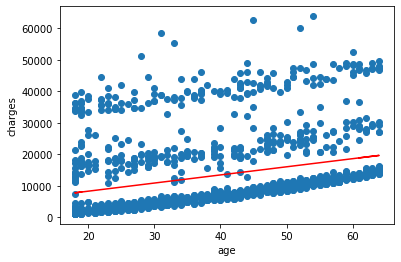

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
slope,intercept,rvalue,pvalue,stderr=stats.linregress(X,y)
plt.scatter(X,y) #산점도
plt.plot(X,slope*X+intercept,c='red') #회귀선
plt.xlabel('age') #x축 라벨
plt.ylabel('charges') #y 축 라벨

In [7]:
#bmi와 보험료의 관계
#귀무가설: bmi와 보험료는 관계가 없다.
#대립가설: bmi와 보험료는 관계가 있다.
from scipy import stats
X=data['bmi'].values
y=data['charges'].values
result=stats.linregress(X,y)
result
#pvalue=2.459085535116683e-13 95% 신뢰 수준하에서 유의
#귀무가설 기각, 대립가설 채택
#결론 : bmi와 보험료는 관계가 있다.ㅣ
#모형의 설명력 rvalue=0.1983409688336289 19.8%

LinregressResult(slope=393.87303079739524, intercept=1192.9372089611497, rvalue=0.1983409688336289, pvalue=2.459085535116683e-13, stderr=53.25073835210321)

Text(0, 0.5, 'charges')

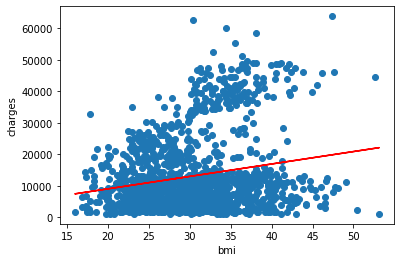

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
slope,intercept,rvalue,pvalue,stderr=stats.linregress(X,y)
plt.scatter(X,y) #산점도
plt.plot(X,slope*X+intercept,c='red') #회귀선
plt.xlabel('bmi') #x축 라벨
plt.ylabel('charges') #y 축 라벨

In [9]:
#자녀수와 보험료의 관계
#귀무가설: 자녀수와 보험료는 관계가 없다.
#대립가설: 자녀수와 보험료는 관계가 있다.
from scipy import stats
X=data['children'].values
y=data['charges'].values
result=stats.linregress(X,y)
result #회귀분석모형
#pvalue=0.012852128520136412 95% 신뢰수준 하에서 유의
# 귀무가설 기각 대립가설 채택
# 결론: 자녀수와 보험료는 관계가 있다.
#모형의 설명력 6.7 % rvalue=0.06799822684790487

LinregressResult(slope=683.0893824813649, intercept=12522.495549644096, rvalue=0.06799822684790487, pvalue=0.012852128520136412, stderr=274.2018326126803)

Text(0, 0.5, 'charges')

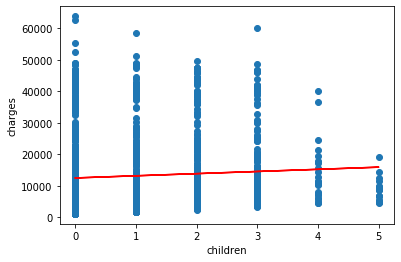

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
slope,intercept,rvalue,pvalue,stderr=stats.linregress(X,y)
plt.scatter(X,y) #산점도
plt.plot(X,slope*X+intercept,c='red')
plt.xlabel('children') #x축 라벨
plt.ylabel('charges') #y 축 라벨

In [11]:
#다중회귀분석
df2=data.iloc[:,[0,2,3]] #iloc 숫자 인덱스 기반 슬라이싱
y2=data.iloc[:,6]

In [12]:
import statsmodels.api as sm
model = sm.OLS(y2,df2) #다중회귀분석 모형
result=model.fit() #학습
print('회귀계수\n',result.params)
print('rvalue\n',result.rsquared)
print('pvalues\n',result.pvalues)
print(result.summary())
#모형의 설명력: 0.5957184482734048 59.5%

회귀계수
 age         205.509604
bmi         162.508428
children    407.682683
dtype: float64
rvalue
 0.5957184482734048
pvalues
 age         1.202690e-22
bmi         8.153462e-09
children    1.133688e-01
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              655.7
Date:                Tue, 18 Feb 2020   Prob (F-statistic):                   6.52e-262
Time:                        10:03:50   Log-Likelihood:                         -14400.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1335   BIC:                                  2.882e+04
Df Model:                           3                                           

In [13]:
#유의하지 않은 children 변수를 제거한 모형
df2=data.iloc[:,[0,2]]
model=sm.OLS(y2,df2)
result=model.fit()
print('회귀계수\n',result.params)
print('rvalue\n',result.rsquared)
print('pvalues\n',result.pvalues)
print(result.summary())
# 모형의 설명력 0.5949583640125079  59.4%

회귀계수
 age    208.863249
bmi    172.394322
dtype: float64
rvalue
 0.5949583640125079
pvalues
 age    1.634082e-23
bmi    3.773924e-10
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.594
Method:                 Least Squares   F-statistic:                              981.2
Date:                Tue, 18 Feb 2020   Prob (F-statistic):                   6.45e-263
Time:                        10:04:50   Log-Likelihood:                         -14401.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1336   BIC:                                  2.882e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                       